In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

# Load CVS file

In [2]:
train_data = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv", index_col="Unnamed: 0")
test_data = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv", index_col="Unnamed: 0")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

In [4]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Data preprocessing

In [5]:
#Change data type from obj to datetime
for col in ["trans_date_trans_time", "dob"]:
    train_data[col] = pd.to_datetime(train_data[col])
    test_data[col] = pd.to_datetime(test_data[col])

In [6]:
train_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [7]:
train_data = train_data.drop(columns=['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'])
test_data = test_data.drop(columns=['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'])

In [8]:
train_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


# Encode categorical features

In [9]:
#Encode categorical features
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()
for col in ["merchant", "category","gender", "job"]:
        train_data[col] = encoder.fit_transform(train_data[col])
        test_data[col] = encoder.fit_transform(test_data[col])

In [11]:
train_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


# Balancing Data

In [12]:
train_data["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [13]:
test_data["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

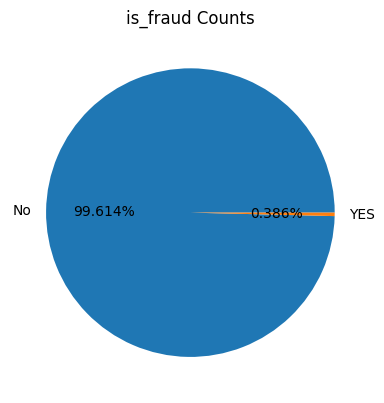

In [14]:
#visualisation data set
is_fraud = train_data["is_fraud"].value_counts()
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["No", "YES"], autopct="%0.3f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [15]:
#We have to minimize the size oF our dataFrame to decrease Fitting time 
df_fraud = train_data[train_data["is_fraud"]==1]
df_Notfraud = train_data[train_data["is_fraud"]==0]

In [16]:
df_Notfraud = df_Notfraud.iloc[:6000]

In [17]:
newTrainData = pd.concat([df_Notfraud, df_fraud], axis=0)

In [18]:
newTrainData.shape

(8145, 12)

In [19]:
# Shuffle the DataFrame
newTrainData = newTrainData.sample(frac=1, random_state=2020).reset_index(drop=True)

In [20]:
newTrainData.head(10)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,571,5,85.41,1,38.1380,-89.2231,2135,123,1371842221,38.164050,-89.068749,0
1,656,12,799.56,1,44.8605,-85.8138,3096,409,1376264276,45.616036,-86.750347,1
2,300,8,809.83,0,33.3305,-105.6933,8874,260,1379985277,32.842035,-104.904134,1
3,380,5,17.62,1,38.4921,-85.4524,564,320,1371908861,38.213306,-86.091533,0
4,235,8,8.43,0,38.4121,-75.2811,718,377,1371867719,38.425790,-74.808462,0
5,273,2,12.21,1,42.0144,-88.0935,92294,81,1383185632,41.529882,-87.425220,1
6,611,5,106.15,0,41.1826,-92.3097,1583,203,1371928432,41.307873,-92.439250,0
7,613,3,46.46,0,38.0261,-97.6666,1689,199,1371869216,37.979640,-97.664979,0
8,185,5,48.25,0,39.9148,-80.7310,16183,327,1371905418,39.448495,-80.903197,0
9,283,1,23.84,1,41.5403,-122.9366,308,55,1371912795,41.152373,-122.226867,0


<Axes: >

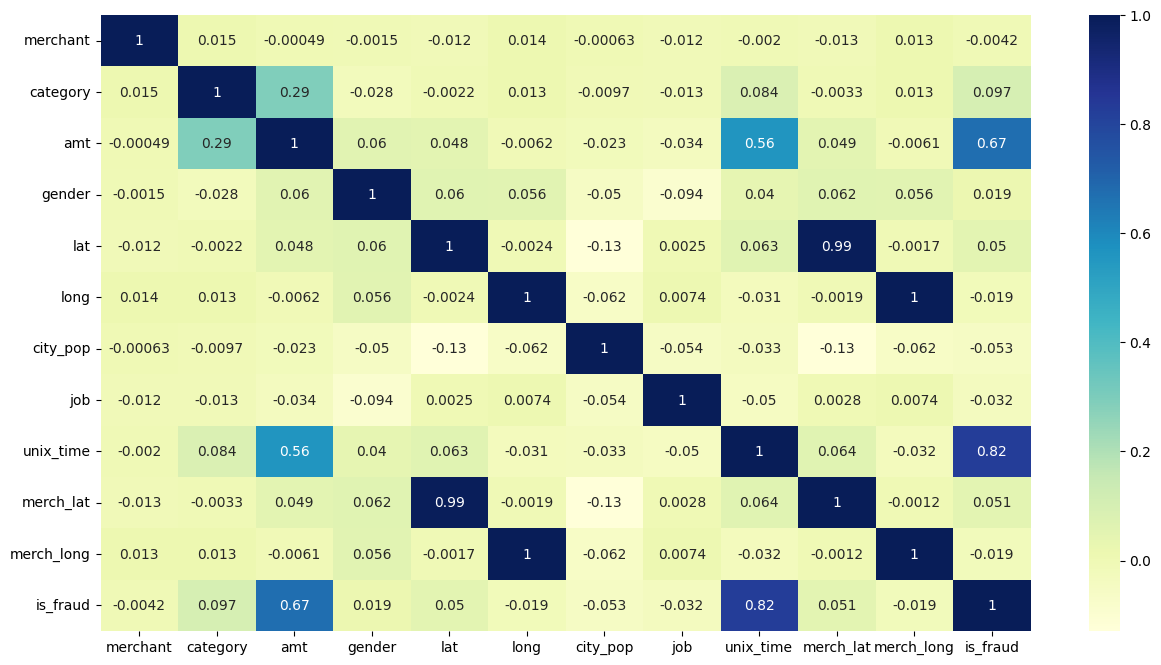

In [21]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.heatmap(newTrainData.corr(), annot=True, cmap="YlGnBu")

**As we can see, there is a strong correlation between the 'is_fraud' column and the 'unix_time' and 'amt' columns.**

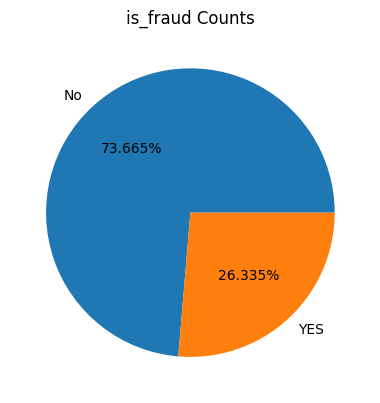

In [22]:
#visualisation data set
is_fraud = newTrainData["is_fraud"].value_counts()
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["No", "YES"], autopct="%0.3f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [23]:
df_train = newTrainData[["amt", "unix_time", "is_fraud"]]
df_test = test_data[["amt", "unix_time", "is_fraud"]]

In [24]:
df_test.shape

(1296675, 3)

In [25]:
df_train.shape

(8145, 3)

In [26]:
X = df_train.drop(["is_fraud"], axis=1)
y = df_train["is_fraud"]

X_test = df_test.drop(["is_fraud"], axis=1)
y_test = df_test["is_fraud"]

#  implement logistic regression model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [28]:
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [29]:
y_pred = logreg.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9942113482561166


In [31]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
